In [32]:
# -*- coding: utf-8 -*-

__author__ = 'sebastian kihle', 'andreas sandvik hoimyr'
__email__ = 'sebaskih@nmbu.no', 'andrehoi@nmbu.no'

import random
import numpy as np


def make_board():
    """Creates the game board with the desired ladders and chutes"""
    num_tiles = [0 for _ in range(96)]

    """Makes ladders"""
    num_tiles[1] = 39
    num_tiles[9] = 2
    num_tiles[37] = 16
    num_tiles[44] = 19
    num_tiles[50] = 30
    num_tiles[66] = 17
    num_tiles[69] = 17

    """Makes chutes"""
    num_tiles[25] = -19
    num_tiles[34] = -30
    num_tiles[43] = -12
    num_tiles[57] = -19
    num_tiles[65] = -37
    num_tiles[75] = -62
    num_tiles[88] = -17

    return num_tiles


def die_roll():
    """Rolls die between 1 and 6"""
    return random.randint(1, 6)


def player_turn(player, board):
    """Function that simulates one die throw for one player and moves up or
    down depending on the value of the position on the table"""

    roll = die_roll()

    player[1] += roll + board[player[1] + roll]

    player[2] += 1

    return player


def single_game(num_players):

    """
    Returns duration of single game.

    Arguments
    ---------
    num_players : int
        Number of players in the game

    Returns
    -------
    num_moves : int
        Number of moves the winning player needed to reach the goal
    """

    board = make_board()
    """Create list with all players named PL (1 to n)"""
    game_players = []
    for number in range(num_players):
        game_players.append("PL {0}".format(number))

    """Makes a list of lists that keeps track of player, position on the board 
    and number of die throws"""
    player_position = []

    for player in game_players:
        player_position.append([player, 0, 0])

    """Plays the game until a player reaches position 90 on the board or 
    higher"""
    while True:
        for player in range(num_players):
            player_turn(player_position[player], board)

            if player_position[player][1] >= 90:
                return player_position[player][2]


def multiple_games(num_games, num_players):
    """
     Returns durations of a number of games.

     Arguments
     ---------
     num_games : int
         Number of games to play
     num_players : int
         Number of players in the game

     Returns
     -------
     num_moves : list
         List with the number of moves needed in each game.
     """

    moves = []
    for _ in range(num_games):
        moves.append(single_game(num_players))

    return moves


def multi_game_experiment(num_games, num_players, seed):
    """
    Returns durations of a number of games when playing with given seed.

    Arguments
    ---------
    num_games : int
        Number of games to play
    num_players : int
        Number of players in the game
    seed : int
        Seed used to initialise the random number generator

    Returns
    -------
    num_moves : list
        List with the number of moves needed in each game.
    """
    random.seed(seed)
    return multiple_games(num_games, num_players)


if __name__ == '__main__':
    games = multi_game_experiment(100, 4, 73)
    shortest_duration = min(games)
    longest_duration = max(games)
    median_duration = np.median(games)
    mean_duration = np.mean(games)
    std_duration = np.std(games)

    print("The shortest game was in {0:} throws, and longest in {1:} "
          "throws.".format(shortest_duration, longest_duration))

    print("The median was {0:}, {1:} as mean and {2:.2f} standard "
          "deviation.".format(median_duration, mean_duration, std_duration))


The shortest game was in 4 throws, and longest in 41 throws.
The median was 16.0, 17.06 as mean and 7.50 standard deviation.


Text(0, 0.5, 'Games')

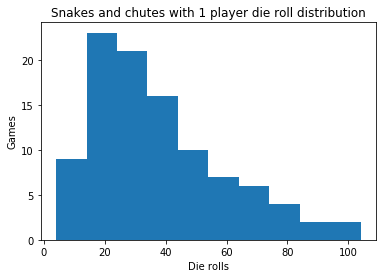

In [33]:
import matplotlib.pyplot as plt

plt.hist(multiple_games(100, 1))
plt.title("Snakes and chutes with 1 player die roll distribution")
plt.xlabel("Die rolls")
plt.ylabel("Games")

Text(0, 0.5, 'Games')

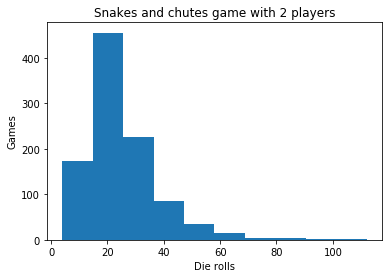

In [34]:
plt.hist(multiple_games(1000, 2))
plt.title("Snakes and chutes game with 2 players")
plt.xlabel("Die rolls")
plt.ylabel("Games")

Text(0, 0.5, 'Games')

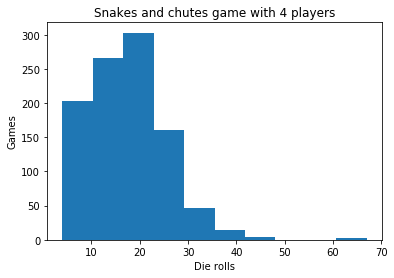

In [35]:
plt.hist(multiple_games(1000, 4))
plt.title("Snakes and chutes game with 4 players")
plt.xlabel("Die rolls")
plt.ylabel("Games")

Text(0, 0.5, 'Games')

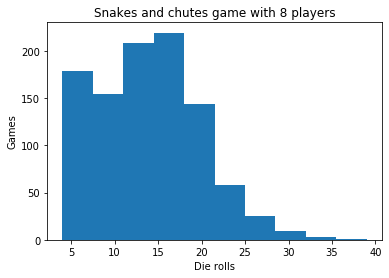

In [36]:
plt.hist(multiple_games(1000, 8))
plt.title("Snakes and chutes game with 8 players")
plt.xlabel("Die rolls")
plt.ylabel("Games")